In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import sys
sys.path.append("src/")

In [15]:
cd src

C:\Users\soner\OneDrive\Masaüstü\source_codes\src


In [5]:
import torch
import pytz
import datetime

from datasets.organic import OrganicDataset
from solver import Solver
from utils import *

import models.dawid_skene as ds

In [17]:
#if you have no gpu
#model = torch.load('src',map_location=torch.device('cpu'))
#if you have gpu
model = torch.load('src')
model.eval()

Ipa2ltHead(
  (basic_network): BasicNetwork(
    (attention): Linear(in_features=50, out_features=1, bias=False)
    (classifier): Linear(in_features=50, out_features=3, bias=True)
    (softmax_batch): Softmax(dim=1)
    (softmax): Softmax(dim=0)
    (sigmoid): Sigmoid()
  )
  (bias_matrices): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=False)
    (1): Linear(in_features=3, out_features=3, bias=False)
    (2): Linear(in_features=3, out_features=3, bias=False)
    (3): Linear(in_features=3, out_features=3, bias=False)
    (4): Linear(in_features=3, out_features=3, bias=False)
    (5): Linear(in_features=3, out_features=3, bias=False)
    (6): Linear(in_features=3, out_features=3, bias=False)
    (7): Linear(in_features=3, out_features=3, bias=False)
    (8): Linear(in_features=3, out_features=3, bias=False)
    (9): Linear(in_features=3, out_features=3, bias=False)
  )
)

In [18]:
from datasets.organic_train_set import OrganicDatasetTrain
dataset = OrganicDatasetTrain(
        text_processor='word2vec', 
        text_processor_filters=['lowercase', 'stopwordsfilter'],
        embedding_path='data/embeddings/word2vec/glove.6B.50d.txt',
        data_path='data/',
        one_dataset_one_annotator = False
        )

# Clustering based on bias matrices

In [19]:
bias_matricesl=[]
k=0
for i in model.parameters():
    k+=1
    if k>3:
        bias_matricesl.append(np.array(i.cpu().detach()))
bias_matrices={}
for i,an in enumerate(dataset.annotators):
    bias_matrices[an]=bias_matricesl[i]

In [20]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ans=[]
matrices=[]
for an in bias_matrices:
  ans.append(an)
  flatten_list = [j for sub in bias_matrices[an] for j in sub]
  matrices.append(flatten_list)
print(ans)
from sklearn.cluster import KMeans
import numpy as np
data = np.array(matrices)
  
  
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(data)
x=principal.transform(data)
  
# Check the dimensions of data after PCA
print(x.shape)

['sumit', 'hannah', 'fahad', 'sarthak', 'felix', 'kamal', 'sebastian', 'omar', 'abilasha', 'florian']
(10, 3)


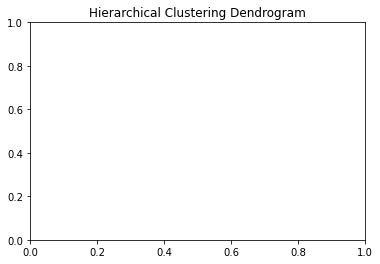

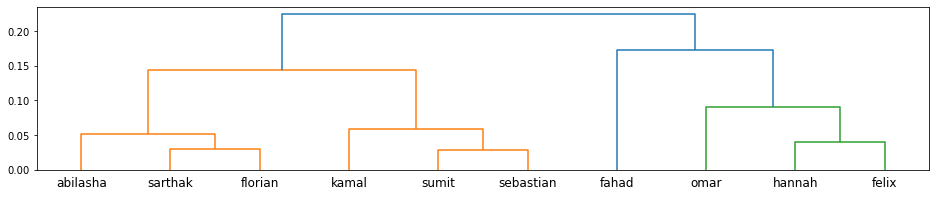

In [21]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=ans,**kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')
model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
fig, axes = plt.subplots(figsize=(16, 3))
plot_dendrogram(model, truncate_mode='level', p=5)
plt.show()

# Clustering based on bias matrices

In [23]:
#if you have no gpu
#model = torch.load('src_spammer',map_location=torch.device('cpu'))
#if you have gpu
model = torch.load('src_spammer')
model.eval()

Ipa2ltHead(
  (basic_network): BasicNetwork(
    (attention): Linear(in_features=50, out_features=1, bias=False)
    (classifier): Linear(in_features=50, out_features=3, bias=True)
    (softmax_batch): Softmax(dim=1)
    (softmax): Softmax(dim=0)
    (sigmoid): Sigmoid()
  )
  (bias_matrices): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=False)
    (1): Linear(in_features=3, out_features=3, bias=False)
    (2): Linear(in_features=3, out_features=3, bias=False)
    (3): Linear(in_features=3, out_features=3, bias=False)
    (4): Linear(in_features=3, out_features=3, bias=False)
    (5): Linear(in_features=3, out_features=3, bias=False)
    (6): Linear(in_features=3, out_features=3, bias=False)
    (7): Linear(in_features=3, out_features=3, bias=False)
    (8): Linear(in_features=3, out_features=3, bias=False)
    (9): Linear(in_features=3, out_features=3, bias=False)
  )
)

In [24]:
bias_matricesl=[]
k=0
for i in model.parameters():
    k+=1
    if k>3:
        bias_matricesl.append(np.array(i.cpu().detach()))
bias_matrices={}
for i,an in enumerate(dataset.annotators):
    bias_matrices[an]=bias_matricesl[i]

In [25]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ans=[]
matrices=[]
for an in bias_matrices:
  ans.append(an)
  flatten_list = [j for sub in bias_matrices[an] for j in sub]
  matrices.append(flatten_list)
print(ans)
from sklearn.cluster import KMeans
import numpy as np
data = np.array(matrices)

['sumit', 'hannah', 'fahad', 'sarthak', 'felix', 'kamal', 'sebastian', 'omar', 'abilasha', 'florian']


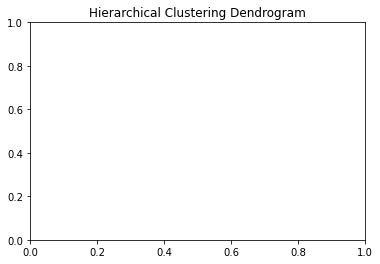

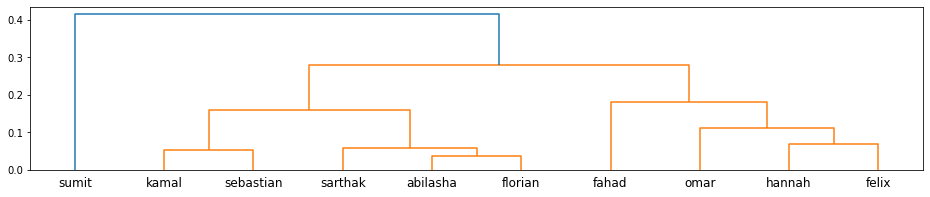

In [26]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=ans,**kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')
model = model.fit(data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
fig, axes = plt.subplots(figsize=(16, 3))
plot_dendrogram(model, truncate_mode='level', p=5)
plt.show()